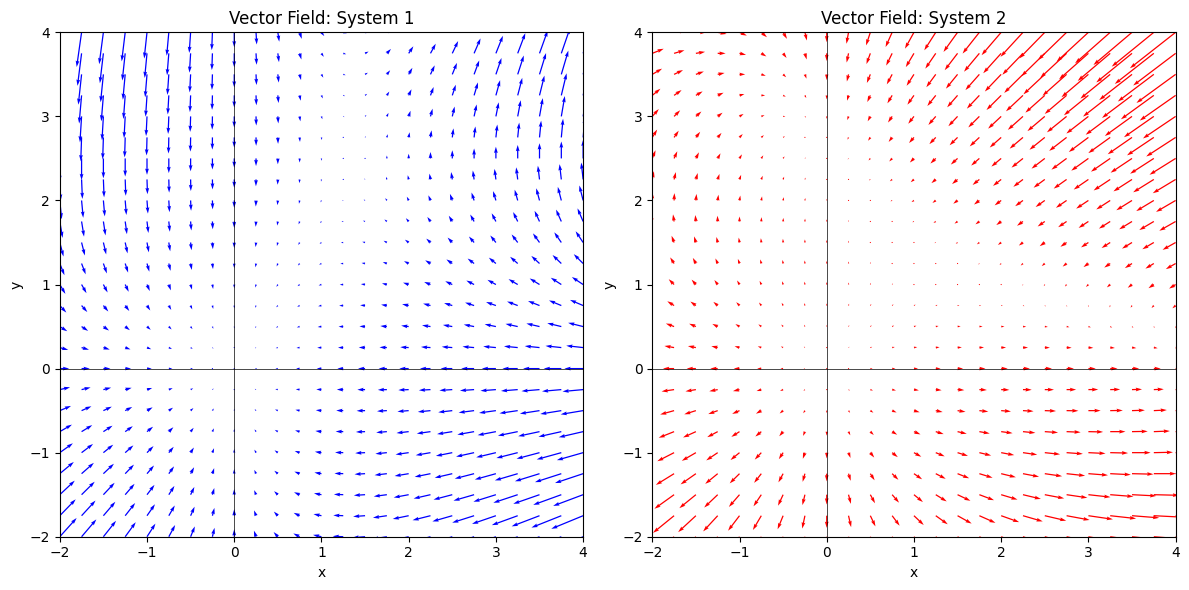

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of (x, y) points
x_vals = np.linspace(-2, 4, 25)
y_vals = np.linspace(-2, 4, 25)
X, Y = np.meshgrid(x_vals, y_vals)

# ---- System 1 ----
# dx/dt = -5x + 2xy
# dy/dt = -4y + 3xy
U1 = -5 * X + 2 * X * Y   # dx/dt
V1 = -4 * Y + 3 * X * Y   # dy/dt

# ---- System 2 ----
# dx/dt = 6x - x^2 - 4xy
# dy/dt = 5y - 2xy - 2y^2
U2 = 6 * X - X**2 - 4 * X * Y
V2 = 5 * Y - 2 * X * Y - 2 * Y**2

# ---- Plotting ----
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot system 1
axes[0].quiver(X, Y, U1, V1, color='blue')
axes[0].set_title("Vector Field: System 1")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].set_xlim([-2, 4])
axes[0].set_ylim([-2, 4])
axes[0].axhline(0, color='black', lw=0.5)
axes[0].axvline(0, color='black', lw=0.5)

# Plot system 2
axes[1].quiver(X, Y, U2, V2, color='red')
axes[1].set_title("Vector Field: System 2")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_xlim([-2, 4])
axes[1].set_ylim([-2, 4])
axes[1].axhline(0, color='black', lw=0.5)
axes[1].axvline(0, color='black', lw=0.5)

plt.tight_layout()
plt.show()

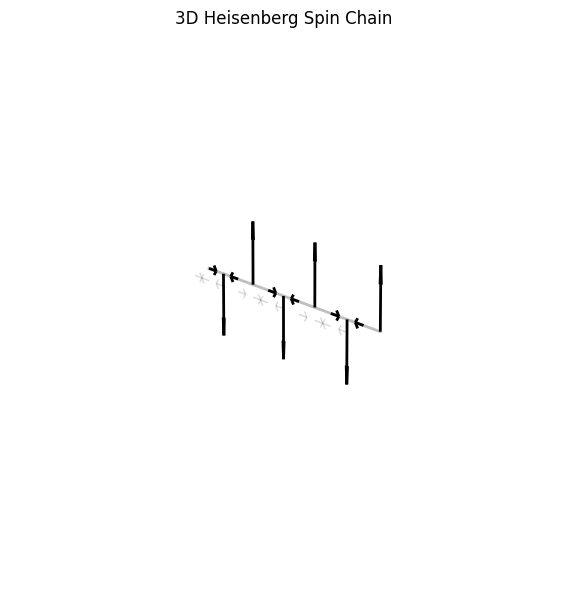

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_spin_chain(spins, scale=0.5, line_color='grey', spin_color='k', shadow_color='k', shadow_alpha=0.15):
    N = len(spins)
    x = np.arange(N)
    y = np.zeros(N)
    z = np.zeros(N)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Chain line
    ax.plot(x, y, z, color='gray', linewidth=2, alpha=0.5)

    for i in range(N):
        # Spin arrow
        ax.quiver(x[i], y[i], z[i],
                  spins[i,0], spins[i,1], spins[i,2],
                  length=scale, normalize=True, color=spin_color, linewidth=2)
        
    # Formatting
    ax.set_xlim(-1, N)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.set_xlabel('Chain index')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Heisenberg Spin Chain')
    ax.set_axis_off() 

    # Perspective + nice view angle
    ax.set_proj_type('persp')     # foreshortening
    ax.view_init(elev=15, azim=145)

    plt.tight_layout()
    plt.show()

# Example spins
N = 10

def make_spiral_state(N):
    return np.array([(np.sin(np.pi * j / 2),  0, np.cos(np.pi * j / 2)) for j in range(0, N)])

spins = np.random.randn(N, 3)
spins /= np.linalg.norm(spins, axis=1)[:, None]  # normalize spins
spins = make_spiral_state(12)

plot_spin_chain(spins)
